<font size = "5"> **Chapter 3:  [Imaging](Ch3-Imaging.ipynb)** </font>


<hr style="height:1px;border-top:4px solid #FF8200" />

# Energy-Loss Near-Edge Structure 

part of 

<font size = "5"> **[Analysis of Transmission Electron Microscope Data](_Analysis_of_Transmission_Electron_Microscope_Data.ipynb)**</font>


by Gerd Duscher, 2019

Microscopy Facilities<br>
Joint Institute of Advanced Materials<br>
The University of Tennessee, Knoxville

Model based analysis and quantification of data acquired with transmission electron microscopes


## Content

- Retrieving and Plotting of reference EELS spectra from the [EELS database](https://eelsdb.eu/spectra/)
- Discussion of the energy-loss near-edge structure (ELNES) of specific edges.

## Load important packages

### Check Installed Packages

In [1]:
import sys
from pkg_resources import get_distribution, DistributionNotFound

def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = get_distribution(package_name).version
    except (DistributionNotFound, ImportError) as err:
        version = '-1'
    return version

# Colab setup ------------------
if 'google.colab' in sys.modules:
    !pip install pyTEMlib -q
# pyTEMlib setup ------------------
else:
    if test_package('sidpy') < '0.0.5':
        print('installing sidpy')
        !{sys.executable} -m pip install  --upgrade pyTEMlib -q
    if test_package('pyTEMlib') < '0.2021.4.20':
        print('installing pyTEMlib')
        !{sys.executable} -m pip install  --upgrade pyTEMlib -q
# ------------------------------
print('done')

done


### Import all relevant libraries

Please note that the EELS_tools package from pyTEMlib is essential.

In [2]:
import sys
if 'google.colab' in sys.modules:
    %pylab --no-import-all inline
else:    
    %pylab --no-import-all notebook
    %gui qt
    
import warnings
warnings.filterwarnings('ignore')

from scipy.ndimage.filters import gaussian_filter

## import the configuration files of pyTEMlib (we need access to the data folder)
import pyTEMlib
import pyTEMlib.file_tools as ft
import pyTEMlib.eels_tools as eels

# For archiving reasons it is a good idea to print the version numbers out at this point
print('pyTEM version: ',pyTEMlib.__version__)


Populating the interactive namespace from numpy and matplotlib
pyTEM version:  0.2021.04.20


## Chemical Shift

The chemical shift is the first feature that we discuss in respect of the shape or appearance of the ionization edges: the energy-loss near edge structure (ELNES).
This section and the following one explain how to do simple analysis of near--edge features. 


The chemical shift refers to small changes (up to a few eV) of the edge onset, and how this shift depends on the bonding of an element in a solid. 
Going back to figure in the [Introduction to Core-Loss Spectra](CH4_07-Introduction_Core_Loss.ipynb), we see that such a change can be caused by a change of the band-gap, in which case the final states are moving or by a movement of the core-levels (initial states). 

Please note, that this explanation above is a simplification; what we measure is the energy difference of an excited atom to one in ground state. In the excited atom all states react to the new electronic configuration and not only the final and initial states. In fact, to calculate the energy-difference, one cannot use the difference between core-levels and bottom of the conduction band. 

However, we want to know which of the above effects (band gap changes or core-level shift) is the major one, so that we can conclude back on bonding of the element in question.





As an example of chemical shift we look at reference data of the silicon L$_{2,3}$ edge.

### Load reference data

In [3]:
Si_L_reference_spectra = eels.get_spectrum_eels_db(element='Si',edge='L2,3')

a_SiO2_Si_L3_S_Schamm_63
a_SiO2_Si_L3_S_Schamm_64
Si_Si_L3_S_Schamm_58
Si3N4_Si_L3_Lingyang_Li_166
Si3N4_(alpha)_Si_L3_S_Schamm_61
Si3N4_(alpha)_Si_L3_S_Schamm_62
SiC(6H)_Si_L3_S_Schamm_65
SiC(6H)_Si_L3_S_Schamm_66
found 8 spectra in EELS database)


### Plot silicon spectra

<IPython.core.display.Javascript object>


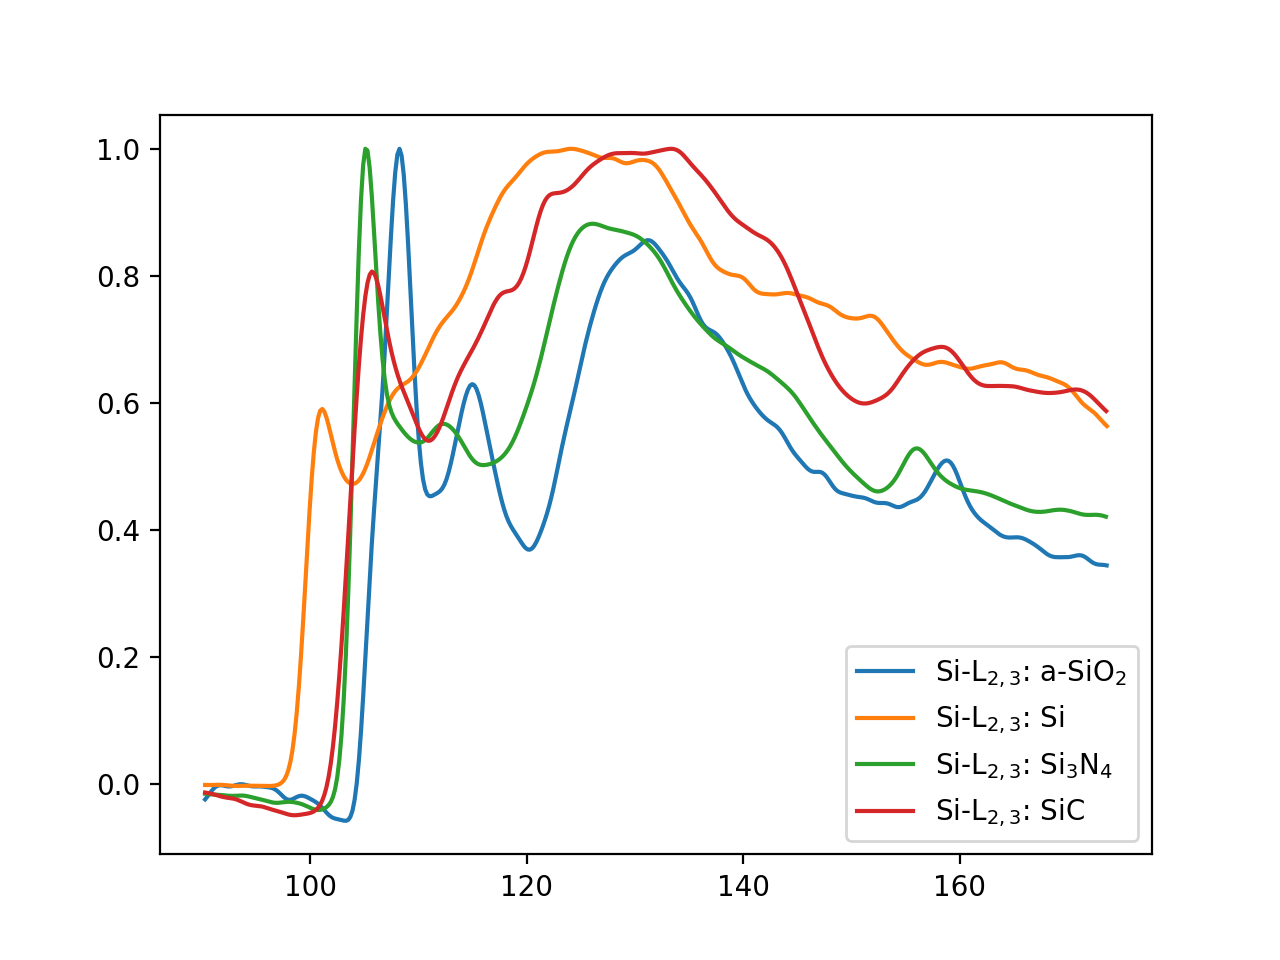

In [4]:
plt.figure()
for name, spectrum  in Si_L_reference_spectra.items(): 
    if 'Core' in  spectrum['TITLE'] or 'L3' in  spectrum['TITLE']:
        #plt.plot(spectrum['enery_scale'],spectrum['data']/np.max(spectrum['data']), label = spectrum['TITLE'])
        pass
        
for name, spectrum  in Si_L_reference_spectra.items(): 
    if 'a_SiO2_Si_L3_S_Schamm_63' in  spectrum['TITLE']:
        plt.plot(spectrum['enery_scale'],spectrum['data']/np.max(spectrum['data']), label = 'Si-L$_{2,3}$: a-SiO$_2$')
    if 'Si_Si_L3_S_Schamm_58' in  spectrum['TITLE']:
        plt.plot(spectrum['enery_scale'],spectrum['data']/np.max(spectrum['data']), label = 'Si-L$_{2,3}$: Si')
    if 'Si3N4_(alpha)_Si_L3_S_Schamm_62' in  spectrum['TITLE']:
        plt.plot(spectrum['enery_scale'],spectrum['data']/np.max(spectrum['data']), label = 'Si-L$_{2,3}$: Si$_3$N$_4$')
    if 'SiC(6H)_Si_L3_S_Schamm_66'in  spectrum['TITLE']:
        plt.plot(spectrum['enery_scale'],spectrum['data']/np.max(spectrum['data']), label = 'Si-L$_{2,3}$: SiC')

plt.legend();


The shift of the edges as above can be caused by the intial and/or the final states.

### Band gap 
The band gap changes are treated in the solid state theory of band structure and are, therefore, well covered in other textbooks. The trend is that with increased oxidation (or more general increased electronegativity of the reaction partner as in the series: B, C, N, O), the band gap opens and the edge shifts to higher energies. 
This is seen in the figure above,  where the onset of the Si-L$_{2,3}$ edge shifts to higher energies with Pauli electron--negativity of the reaction partner.


In fact, one can monitor band gap changes with stoichiometry at interfaces by the shift of the edge.
Please be aware that we see only the shift of the conduction band bottom and not the whole band gap change. This effect of the band gap is obvious between Si and SiO$_2$, where the edge shifts by about 6.5 eV.

### Core-level shift
The initial state, the ``core-level``,  can also shift, for example after oxidation. Some electrons will transfer to an anion (for example oxygen) and less electrons are available to fill the band structure. This is shown below for the case of Cu and its two oxides Cu$_2$O and CuO.


The more electrons transfer to oxygen for the ionic bonding of these materials, the more the edges shift to lower energies, even though a band gap opens up. The  opening up of the band gap will cause a shift too higher energies and counteracts the effect of ionization. Due to lower electron densities, at the Cu atoms in the oxides, the core levels are assumed to shift to higher energies (see below) and compensate a little for the effect.

>
> 
>


The core-level shift is generally a small effect. This core states react to increase of electron density at the atom site with a decrease and vice versa. Simplified , we can think of the core level electrons getting repulsed from an increased electron density (through Coulomb interaction) and pushed closer (lower in energy) to the core.


In [5]:
Cu_L_reference_spectra = eels.get_spectrum_eels_db(element='Cu',edge='L2,3')

Cu_Cu_L3_Y_Kihn_124
Cu2O_Cu_L3_Y_Kihn_129
Profile Of Cu4O3-Cu L23
CuO_Cu_L3_Y_Kihn_127
found 4 spectra in EELS database)


<IPython.core.display.Javascript object>


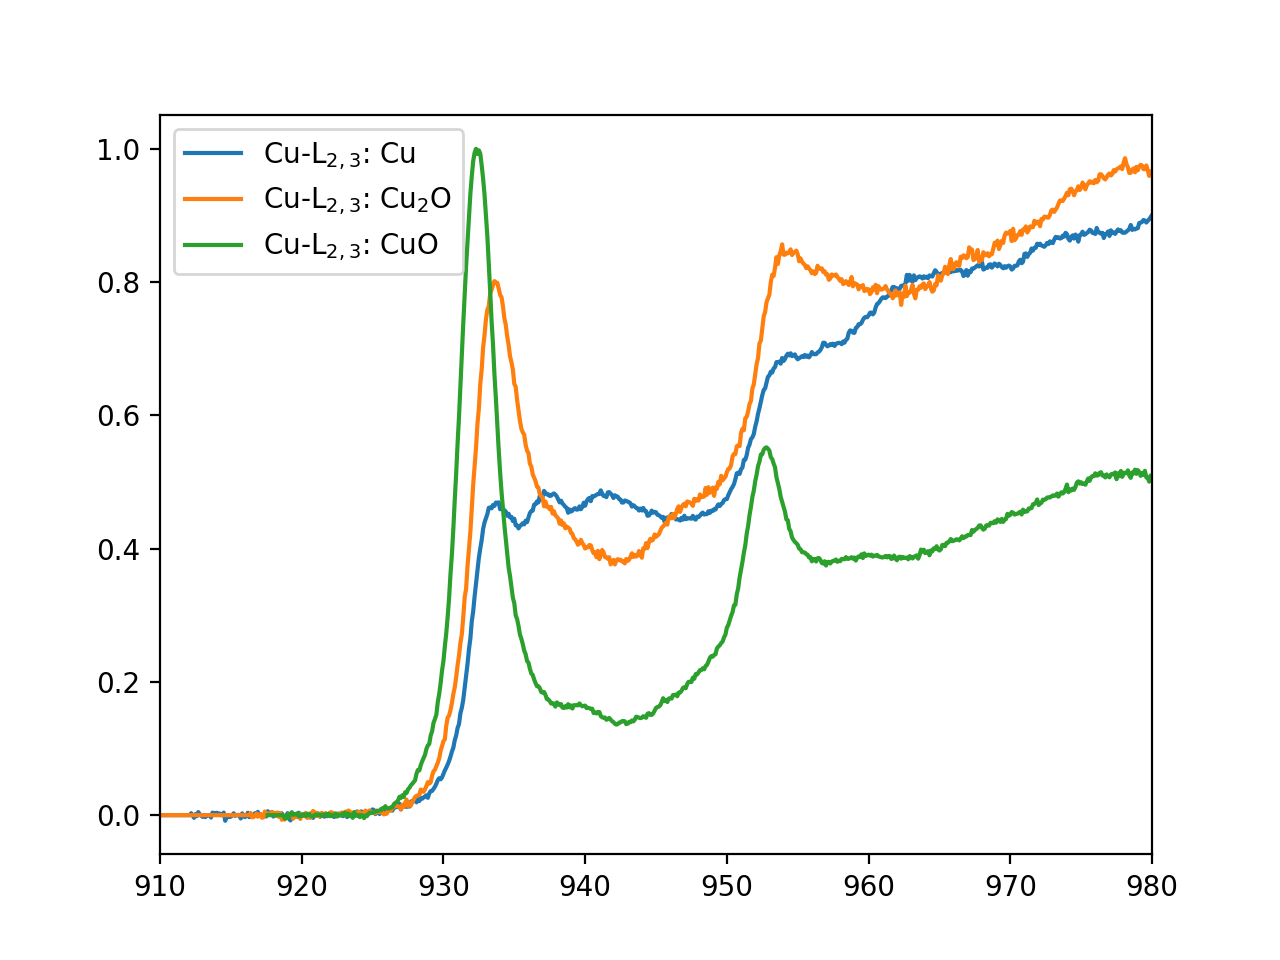

(910.0, 980.0)

In [6]:
plt.figure()

for name, spectrum  in Cu_L_reference_spectra.items(): 
    if 'Cu_Cu_L3_Y_Kihn_124' in  spectrum['TITLE']:
        plt.plot(spectrum['enery_scale'],spectrum['data']/np.max(spectrum['data']), label = 'Cu-L$_{2,3}$: Cu')
    if 'CuO_Cu_L3_Y_Kihn_127' in  spectrum['TITLE']:
        plt.plot(spectrum['enery_scale'],spectrum['data']/np.max(spectrum['data']), label = 'Cu-L$_{2,3}$: CuO')
    if 'Cu2O_Cu_L3_Y_Kihn_129' in  spectrum['TITLE']:
        plt.plot(spectrum['enery_scale'],spectrum['data']/np.max(spectrum['data']), label = 'Cu-L$_{2,3}$: Cu$_2$O')

plt.legend();
plt.xlim(910, 980)


The case of the oxidized Cu where the slightly oxidized Cu$_2$O does shift to slighly lower energies compared to pure Cu, 
the shift to lower energies due to ionic bonding is a little larger than the opening of the band gap and the core level shift to higher energies (further away from the nucleus) because of less Coulomb repulsion from the valence electrons.

This effect is even more pronounced for CuO with an larger band gap than Cu$_2$O.

In the figure below we see that the Si-L$_{3,2}$ edge shifts to higher energies with increased Ge content, when the spectra are taken from different locations at the diffuse Si - Ge interface. Intuitively, we would expect a shift to lower energies, because the band gap of SiGe alloys and of Ge is smaller than Si.


<img title="si-ge-shift" width="50%" alt="core-loss" src="images/si-ge-shift.jpg">


*We see that as we acquire spectra at the diffuse interface between Si and Ge, that the Si-L${_3,2}$ edge shifts to higher energies. This is surprising as SiGe and Ge posses a smaller band gap than Si and one would expect the opposite.*

This shift can be explained by a shift of core levels. An all electron calculations can determine the 2p$_{3/2}$ core levels of an atom in a compound which is shown for Si-Ge and Si-GaAs alloys in the figure below. The calculations show that there is a core level shift to lower energies with increased Ge and GaAs content. Ge and GaAs will add additional electrons to the electronic structure and the Coulomb repulsion between core level electrons and valence electrons will increase, pushing the core levels to lower energies. 

<img title="si-ge-shift" width="50%" alt="core-loss" src="images/core-level-shift.jpg">

*All electron ab initio calculations of the core level states for Si-Ge and Si-GaAs alloys with different composition. The calculations show an 2p$_{3/2}$ core level shift to lower energies with deviation of composition from pure Si (on the left).*


The shift of the core--levels to lower energies will increase the distance between core--level and conduction band bottom, which results in a simple picture in a shift to higher energies. We see that for pure Si, the 2p$_{3/2}$ core level is at about 89 eV but the edge is at 99.8 eV. The difference in energy is caused by relaxation of valence and core electrons. Effectively, we measure with the EELS edge onset  the energy difference between an excited atom and an atom in its ground state.

All electrons will relax according to the overall electron density at the atom sites and the calculated core--level shifts can not be used for predicting the edge shifts.  However, these calculations can explain the physical origin of the edge shift.

### Conclusion
In summation, we can say that the following effects (strongest first, weakest last) cause a chemical shift:

- band gap opening
- ionic bonding
- core level shift

All of these effects can be present at once, but usually  only one dominates the chemical shift.


## White Line

In this section, we try to analyze a distinct feature of the transition metal elements. The d-states of transition metal elements form a very flat band in the band structure. This flat band, creates a strong peak in the density of states. This analysis is based on the following simplification:

In the figure below, we see a s or p free electron like band in the general shape of a parabola, This parabola gives rise to a saw tooth like feature in the density of states (DOS) because flat bands have a higher density of states than steep ones. The DOS of the conduction band (above the Fermi level) is closely related to our EELS spectra. A flat d-band will cause a very prominent peak, a so called white line (in the age of photographic recording, these peaks appeared as white lines).


<img title="si-ge-shift" width="30%" alt="core-loss" src="images/DOS-bandstructure.jpg">
 *A schematic of the relationship of density of states (DOS on the left) and band structure of a transition metal element on the right). The s and p free electron like bands (parabola) give rise to saw tooth like feature in the DOS and the flat d bands (red) cause a sharp peak in the DOS.*
 
Since these d-bands are so prominent we can easily separate them from the rest. In figure \ref{fig:Ti-whiteline} we use the calculated cross--section as a model of the s and p free electron like states. After a subtraction, we get the pure d-band contribution.

<img title="si-ge-shift" width="50%" alt="core-loss" src="images/Ti-L-whiteline.jpg">
*We use the cross section of  the Ti-L$_{2,3}$ edge (green) as a model for the free electron gas and subtract it from the experimental Ti-L$_{2,3}$ edge (red). The residual peaks (blue) can be analyzed as pure d-states. The two double peaks of  the Ti-L$_{2,3}$ edge indicate that there is some structure to the d-bands (here crystal field splitting).*

A simple analysis of the white line ratios of Ti-L$_3$ to Ti-L$_2$ of SrTiO$_3$ yields a intensity ratio of 242 / 314 = 0.8. However, just considering the initial states (and assuming the transition probability ( or more accurately the transition matrix elements) are the same for both edges) with 4 electrons in p$_{3/2}$ and 2 electrons in p$_{1/2}$ would let us expect a ration of 2 to 1. 

>Please, note that both the Ti-L$_3$ and Ti-L$_2$ edge are split in two. We will discuss this crystal field splitting in chapter \ref{sec:Titanium} as an ELNES feature. Here we just consider the sum over the the whole Ti-L$_3$ or/and Ti-L$_2$ and ignore this splitting.

The deviation from the 2 : 1 white line ratio is assumed to be caused by J-J coupling, and is, therefore, symmetry dependent. The anomalous white line ratios have been used to determine valency of transition elements in compounds. Physically this approach is on shaky ground, because we do not know all the reasons for the change in the ratios, it has, however, been shown to be reliable for binary metallic alloys.

Fortunately, there is a easier method (from the physical point of view). We compare the total amount of white line intensities (which corresponds to the empty d-states) and normalize them by the free-electron gas like intensity beyond the white lines. 

We use the method of Okamoto et al. \cite{Okamoto-Disko1992}. 


The energy-window for the free-electron like part of the edge can be chosen arbitrarily and consistently.
Following Okamoto et al., a  50 eV  integration window should be used 50 eV beyond the edge onset. These will allow to compare the results to values in the literature. 
The edge has to be taken in very thin areas and if possible corrected for single scattering distribution, because otherwise the free electron like part contains plasmon contributions, which change the analysis.

For the above spectrum in the figure  above, we get for the white line / free electron gas ratio (50 eV - 50 eV beyond edge onset) =  556 / 974 = 0.57. Ti in SrTiO$_3$ can be considered as Ti$^{4+}$ with no  electrons in the d-bands, but using this ratio in the paper of Okamoto et al.  would yield a d band occupancy of 4 as in a metal. The difference may lay in the usage of a Hatree-Slater X-section for the analysis while Okamoto et al. use a hydrogenic one. Also, the SrTiO$_3$ spectrum was presumably taken under completely different acquisition conditions than Okamoto's spectra. 
\
For example, the SrTiO$_3$ spectrum was not corrected for convergence angle, even though it was acquired in Z-contrast mode. Another source of error, is of course the background fit, which could change especially the free electron integration result. The fact that the SrTiO$_3$ spectrum was not corrected for single scattering distribution may also overestimate the free electron gas contribution, even though the spectrum was taken in a every thin area.

For TiO$_2$ spectrum of the core-loss atlas I get for the white line / free electron gas 256 / 494 = 0.52. TiO$_2$ contains also only Ti$^{4+}$. This is the level of agreement we can expect, if we use two spectra with completely different acquisition parameters. 


In the plotof the Cu-L edges above, we can see that Cu has no empty d-states but with oxidation the d-bands get unoccupied and white lines appear. The more electrons get transferred to the oxygen neighbors, the more empty d-states and the more prominent the white lines will appear.

This analysis of the occupancy of d-states is extremely important for magnetic materials where the strength depends on the unpaired (d-band or f-band) electrons.

The same analysis can be done for the empty f bands of M--edges, which are also rather flat. Usually, the M$_{4,5}$ and the M$_{2,3}$ edges form doublets of white lines.




## ELNES

So far, we have only interpreted distinct features of the shape of the ionization edges. A general approach is to look at the shape of the edges in total and use this shape as a kind of fingerprint for the interpretation. Another one is to try to understand the different features as means of electronic structure calculations of various sophistication. 

In order to understand the different approaches ( and their level of confidence in the results), we will discuss the most important edges one by one.

The shape of the ELNES is closely related to the density of states of the conduction band. The next chapters discuss the basics for an electronic structure interpretation of ELNES



### Transition matrix and electronic structure
The single scattering intensity of an ionization edge $J_k^1(E)$ is related to the band structure through Fermi's Golden Rule: The transition rate is proportional to the density of final states $N(E)$ multiplied with the square of an atomic transition matrix $M(E)$
 
 \begin{equation} \Large
 J_k^1(E) \propto |M(E)|^2 N(E)
 \end{equation} 
  
  The transition matrix describes the transition probability between the core states and the final states (given by $N(E)$). Because the transition probability generally decreases with higher energies (above the edge threshold, the transition matrix gives the overall shape of the edge (sawtooth) and can be determined by atomic physics. 
  

  The density of final states (conduction band) ($N(E)$) expresses the chemical environment and its symmetry. 
  Because the core--levels are highly localized the final states $N(E)$ present the local density of states. This localization causes a different shape for different elements in the same compound, even if they are nearest neighbors (with a distance of  only a few Angstrom). The $N(E)$ will of course be different for elements in materials with different (local) symmetry, coordination or chemical composition.
  
### Life-time broadening
  For arbitrary excitations, the $N(E)$ is the joint density of states, which means a convolution of the initial and the final states. The density of final states $N(E)$ is broadened in the spectrum by the energy resolution of the experimental  setup $\delta E$ and the width of the initial state $\Gamma_i$. $\Gamma_i$ can be approximated with the uncertainty principle: 
  
  \begin{equation} \Large
  \Gamma_i \pi_h \approx \hbar
  \end{equation}

   The lifetime of the core -hole $\pi_h$ is determined how fast the core--hole is filled and the additional energy is dissipated through emission of Auger electrons (for light elements) or X-ray photons (heavier atoms). The value of $\Gamma_i$ depends on the threshold energy of the edge and is calculated to be around 0.1 and 2 eV for K-edges of the first 40 elements.
 

 Further broadening of the $N(E)$ is induced by the lifetime of the final states $\pi_f$. The inelastic mean free path of the ejected electron is only a few nm (assuming a kinetic energy of less than 50eV). 
  Using the free electron approximation ($E_{kin} = m_0 v^2 / 2$), we get for the energy broadening  of the final states:
  \begin{equation} \Large
  \Gamma_f \approx \frac {\hbar}{\pi_f} = \frac{\hbar v}{\lambda_i } = \frac{\hbar}{\lambda_i} \sqrt{\frac{2E_{kin}}{m_0}} 
  \end{equation}
 
  
  Since the inelastic mean free path $\lambda_i$ varies inversely with kinetic energy $E_{kin}$ below 50 eV (and raises only slightly above 50 eV), the observed density of state structure is more and more broadened the further the distance from the onset. 
    
  The next two chapters discuss the density of final states $N(E)$ and the transition matrix $M(E)$ in detail.
 

### Dipole-selection rule

Assuming a single electron approximation (and almost no electronic theory theory solves the many-particle problem fully) for the excitation, we can replace the many electron transition matrix elements with single electron matrix elements $M(\vec{q},E)$.

\begin{equation} \Large
M(\vec{q},E) =  <f|\exp(i\vec{q}\vec{r})|i>
 \end{equation}
 
 with the initial wave function $|i> = \phi_i$ and the complex conjugated final wave function $<f|=\phi_f$.
 The integration is over the volume $\tau$ surrounding the initial state (and we get a high localization again). 
 
 We now expand the operator $\exp(i\vec{q}\vec{r})$ as :
 
\begin{equation} \Large
\exp(i\vec{q}\vec{r}) = 1 + i\vec{q}\vec{r} + \mbox{higher--order terms} 
\end{equation}

Because the final and initial wave functions must be orthogonal to each other, the first term gives zero.
The higher--order terms are assumed to be negligible. 

The second term has odd symmetry and determines the dipole selection rule:
- if the initial and final wave functions are both even or odd, then the result is zero.
- only if one of the  initial and final wave are odd and one of them is even the result is not zero. 

 There is no transition probability for s to s transitions or p-p transitions or d-d or s-d transitions.
 However, transitions are possible from s to p states and from p to s and d states.
 
 The (optical) dipole selection rule says the angular quantum number $l$ of the initial and final state must differ by 1: $\delta l = \pm 1$.

 For the dipole selection rule to be valid, obviously the higher order terms must be very small, otherwise a third integral (of the dipole--forbidden reflections) will modify the observed ELNES.

 A rough estimates leads to the requirement $\vec{v}\vec{r} <<1$ for all $r$, which is equivalent to $ q<<q_d = 1/r_c$ where $r_c$ is the radius of the core state. This radius $r_c$ denotes the volume where the transition occurs.
 And we get for the carbon K-shells ($Z^* = Z- 0.3$) and 100kV acceleration energy that the dipole selection rule should be applicable for $\theta << \theta_d = 63 mrad$. For the Si L$_{3,2}$ edge the dipole selection rule should prevail up to about 12 mrad. 
  

 Therefore, we must use rather small aperture ( $ < 10 - 20$ mrad) centered at the zero beam to insure the dipole selection rule to be valid.
 

### Core--hole effects and excitons

 So far, we can say that our ELNES can be calculated by the site and angular momentum projected density of states. This is true for almost all metals, but the core-hole effects (through excitonic interactions of the core--hole with the excited electron and valence electrons)  further modifies the final density of states $N(E)$.
 
The missing electron in the core hole and the extra electron in the conduction band causes changes in the band structure (in the core, valence and conduction states regions).
These relaxation processes of all the electrons involved can be rather complicated and we have to know when these complications have to be applied. 

<img title="si-ge-shift" width="50%" alt="core-loss" src="images/onset.jpg">
*A method to determine the edge onset from XPS data and the band gap, if core--hole effects are  negligible. This is only true for metals with an almost complete screening of the core--hole.*

As illustrated in the figure above (Pantelides, PRL 1975), if there is no influence of the core-electron, the edge onset of the ionization edge should be determined by:
\begin{eqnarray} 
E_{\mbox{onset}} &=& E_{\mbox{core-state}} - E_{\mbox{CB}}\\
 &=& (E_{\mbox{core-state}} - E_{\mbox{vacuum}} ) + (E_{\mbox{vacuum}} - E_{\mbox{CB}} )\\
 &=& (E_{\mbox{core-state}} - E_{\mbox{vacuum}} ) + (E_{\mbox{vacuum}} - E_{\mbox{VB}} ) +(E_{\mbox{VB}} - E_{\mbox{CB}} ) 
\end{eqnarray}

The distances between core--states and vacuum and valence band (VB) and vacuum are directly accessible with XPS, while the band gap ($E_{\mbox{VB}} - E_{\mbox{CB}} $) is available from optical spectroscopy.  

Therefore the calculated density of states not including core holes should start at that energy, If the agreement is not In all other cases, we must assume that the (excitonic) core-hole effects modify the $N(E)$.

This modification of $N(E)$ can be compared to doping effects in semiconductors as shown in the figure below, where the whole band structure shifts due to the extra electron. This shifting of bands (up and down) is due to the different screened potential of an excited atom compared to an atom in ground state.

<img title="si-ge-shift" width="50%" alt="core-loss" src="images/comp-doping.jpg">
 *Comparison of doping and core--hole effects on the electronic structure. Both effects modify the band structure.*

The modifications of the core hole effect not be predicted without extensive calculations.
Two methods have profen to be successful for ELNES calculations:
- explicit core hole in an all electron calculation (like FLAPW)
- Z+1 approximation in pseudo potential calculations (like VASP) 

In the explicit core-hole approach, we just take one electron from a core level of one atom in the supercell and place it (energetically) on top of the other electrons of that (now excited) atom.
Now, the electronic structure calculations give the ELNES as the local and angular projected density of states of the excited atom.

In the Z+1 calculation, the atom with the explicit core-hole is replaced by an atom with an atomic number increased by one. The core hole is simulated by an nuclear charge that is increased by one and the excess electron is there naturally. This Z+1 approximation can be used in combination with the much faster pseudo potential methods. The results of this approximation are very close to the explicit core hole simulations.
    

## ELNES Examples

### Carbon


	
Carbon has 4 valence electrons.\\
As a free atom has two electron in 2s and two electron in 2p states.\\
In a compound, it is easier to understand the bonding assuming that there is only one electron in the 2s state and three electrons in the 2p state.

Carbon can bond in three modes and as elemental material stays in two modification: 
 - Diamond:  sp$_3$ hybridization
 - lonsdaleite: sp$_3$ hybridization
 - Graphite:  sp$_2$ hybridization

	
The energy levels of the 2s and 2p levels are so close together that they can hybridize (as many elements in the first row of the periodic table). Hybridization means the states are indistinguishable (in energy). Carbon is unique in a sense as it can hybridize so that 2, 3 or 4 electrons hybridize. The 1s (occupied by one electron) and two or all three p states hybridize into states with p character, which means they are directional and form covalent bonds.

In the case of the sp$_2$ bonds, one of the p electrons does not contribute to bonding and is de-localized. This de-localized electron is the reason for graphite to be conducting, while in diamond all electrons are involved in covalent bonding and consequently diamond is an insulator. This extra (non-hybridized) 2p electron does the double bonding in molecules and polymers.

<img title="si-ge-shift" width="50%" alt="core-loss" src="images/sp2-sp3.jpg">
*Comparison between  $sp_2$ and $sp_3$ hybridization. The  $sp_2$ hybridization causes a layered structure and a de--localized electron. The  $sp_3$hybridization causes a bond angles of 109.5${\circ}$.*
	

	
Graphite has three covalent bonds and forms a layered structure with three nearest neighbors within the layers \ref{fig:sp2}. Within the layer, the $sp_2$ hybridization does the covalent bonding. The layers are bonded together with the weak Van-der-Waals force. Diamond has 4 covalent bonds and forms with its 4 neighbors a tetrahedron. The bond angle in diamond are 109.5 and fill all three dimensions.



In [7]:
C_reference_spectra = eels.get_spectrum_eels_db(element='C',edge='K')

8-pm
8-pm
B4C_B_K_Otmane_Abidate_41
B4C_C_K_Otmane_Abidate_42
C_C_K_V_Serin_17
C_C_K_M__Jaouen,_G__Tourillon_20xray
C_C_K_M__Jaouen,_G__Tourillon_21xray
C_C_K_Otmane_Abidate_24
C_C_K_Odile_Stephan_226
C_C_K__243
C_(graphite)_C_K_David_Muller_(at_Cornell_University)_1995_23
7-pm
E113 250-2-cal-kgd-pm-dm
e113 k-pm
255-1-pmmod
C3N6H6_C_K_Susana_Trasobares_114
C3N6H6_C_K_Susana_Trasobares_115
CN_C_K_Susana_Trasobares_122
Cr3C2_C_K_R__Leapman_11
Cr7C3_C_K_R__Leapman_13
CrC_C_K_Christina_Scheu_176
FeCO3_O_K_A__Gloter,_A__Chen_206
MgCO3_O_K_Irmgard_Rom_43
MgCO3_C_K_Irmgard_Rom_44
SiC_beta_Si_K_Flank_30xray
found 24 spectra in EELS database)


<IPython.core.display.Javascript object>


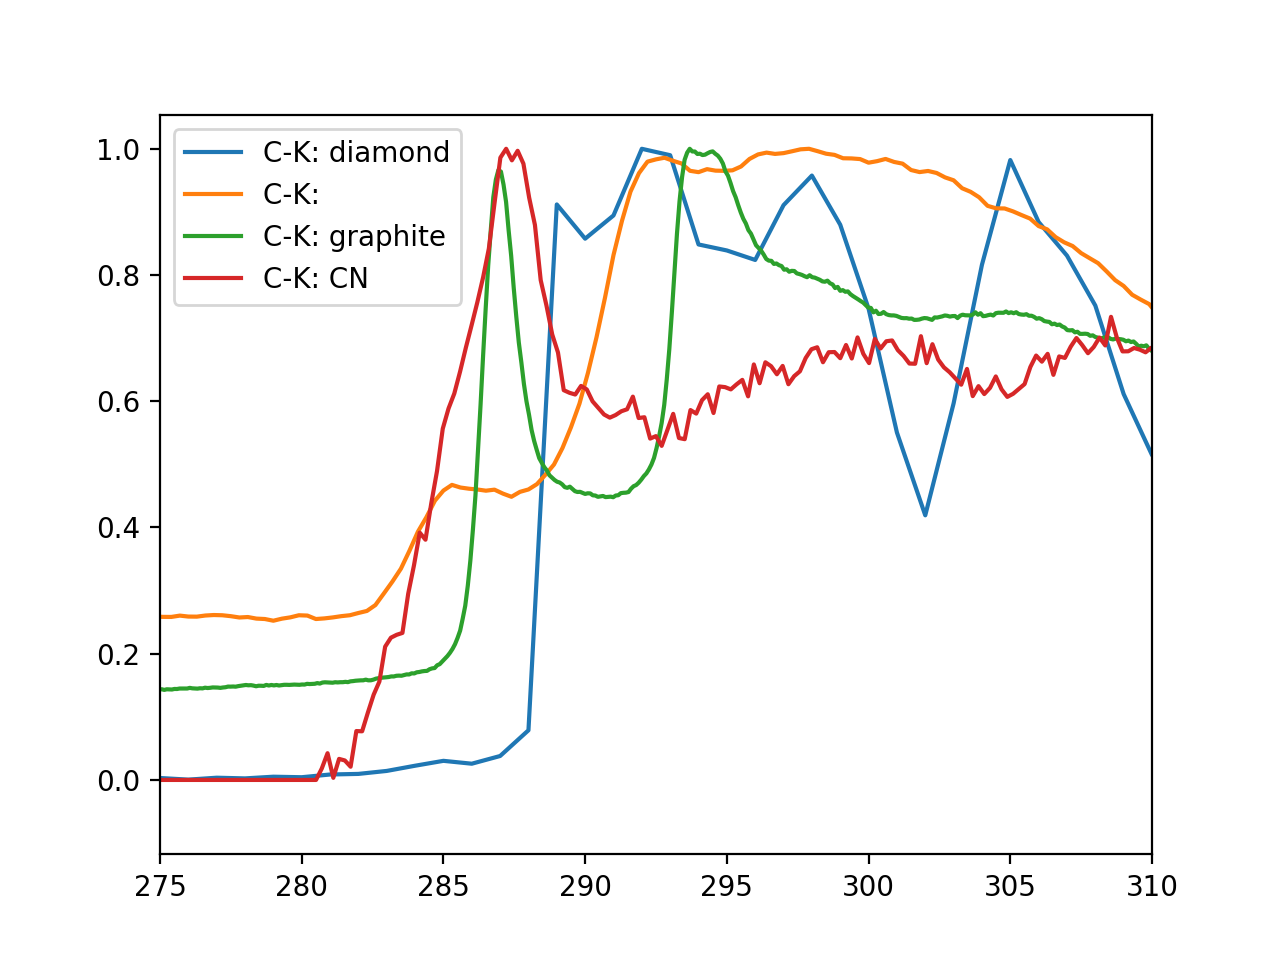

(275.0, 310.0)

In [8]:
plt.figure()
for name, spectrum  in C_reference_spectra.items(): 
    if 'Core' in  spectrum['TITLE'] or 'L3' in  spectrum['TITLE']:
        #plt.plot(spectrum['enery_scale'],spectrum['data']/np.max(spectrum['data']), label = spectrum['TITLE'])
        pass
        
for name, spectrum  in C_reference_spectra.items(): 
    if 'C_(graphite)_C_K_David_Muller_(at_Cornell_University)_1995_23' in  spectrum['TITLE']:
        plt.plot(spectrum['enery_scale'],spectrum['data']/np.max(spectrum['data']), label = 'C-K: graphite')
    if 'C_C_K_M__Jaouen,_G__Tourillon_21xray' in  spectrum['TITLE']:
        plt.plot(spectrum['enery_scale'],spectrum['data']/np.max(spectrum['data']), label = 'C-K: diamond')
    if 'C_C_K__243' in  spectrum['TITLE']:
        plt.plot(spectrum['enery_scale'],spectrum['data']/np.max(spectrum['data']), label = 'C-K: ')
    if 'CN_C_K_Susana_Trasobares_122' in  spectrum['TITLE']:
        plt.plot(spectrum['enery_scale'],spectrum['data']/np.max(spectrum['data']), label = 'C-K: CN')
plt.legend()
plt.xlim(275, 310)

Looking at the bonding of carbon in molecular orbital theory or (its predecessor) Ligand--Field theory the  non--hybridized p electron in graphite will form an occupied $\pi$ bond and an unoccupied $\pi^*$ bond. In figure \ref{fig:C-K} we see that the unoccupied $\pi^*$ state is visible in the graphite spectrum. 
In diamond, there is no molecule like p electron and consequently there is no $\pi$ or $\pi^*$ bond. 
The appearance of the $\pi^*$ state in a carbon spectrum is used as a fingerprint for $sp_2$ hybridization. In the case of so called diamond like carbon, an amorphous carbon with $sp_2$ and $sp_3$ bonds, the quality (amount of $sp_3$ bonds) of the diamond like carbon can be assessed by the  intensity of the  $\pi^*$ peak (or rather the lack of it).

Both spectra have a $\sigma_1^*$ and $\sigma_2^*$ peak which are associated with the molecule like s states.
The C-K edge should show only the p density of states due to the dipole selection rule. The $\sigma^*$ states show up in the C-K edge because of these states are already related to the s-p like free electron gas density of states (s-p hybridization) above the edge. The $\sigma^*$ states are the non-bonding states of the ( $sp_2$ or $sp_3$) hybridized states and are, therefore, present in any carbon compound.

The quantification of $sp_2$ versus $sp_3$ hybridization is also important in polymers (where the non hybridized p electron in a $sp_2$ configuration forms the  conducting double bonds. In Buckminster fullerens (bucky balls) and carbon nanotubes the $sp_3$ hybridization is always associated with a defect (dislocation like), where a carbon atom has now 4 nearest neighbors.


### Silicon

The calculation of the transition matrix $M(E)$ for 
the Si-L$_{3,2}$ edge shows that the intensity of the ELNES consists almost exclusively of d-states. Less than 5\% of the intensity is from the also dipole--allowed s-DOS. 

We can, therefore, assume that only d-states form the Si-L$_{3,2}$ ELNES.
The spin orbit splitting of the initial p states is 0.7 eV, and this means that the L$_3$ and the L$_2$ are separated by 0.7 eV, which cannot be resolved with most instrumental setups. 
To the calculated (local) d-DOS the same DOS has  to be added (with a ratio of about 2:1)  but shifted by 0.7 eV.
    
<img title="si-ge-shift" width="50%" alt="core-loss" src="images/Si-pure.jpg">
*Comparison of experimental and theoretical data. While an effective mass exciton would explain the sharp raise, the effect is to small, the electronic structure  calculation without core hole effect, placed at the correct onset, does not agree with the experiment.*
	
The edge onset of the Si-L$_{3,2}$ of pure Si should be at 100 eV without core-hole effects.  A d--Dos calculated without influence of a core--hole is shown in figure \ref{fig:Si-L-pure} beginning at this value. We can clearly see that this DOS of state cannot reproduce the experimental ELNES. From this disagreement between experiment and DOS without core-hole effect, we conclude that the 
	core-hole effects must be included.
	
The main feature of the Si-L$_{3,2}$ of pure Si is the extreme sharp raise of the edge at the onset.
This feature cannot be explained by the d-DOS calculated without core--hole effects, which raises not as steeply as the experimental ELNES.
	
This steep raise is another indication of the core--hole and must have its origin in an excitonic effect (an interaction of the excess electron in the conduction band an the hole in the core state).
In the figure above, the calculations of an effective mass electron (due to an state that is created just below the conduction band) is compared to the experimental ELNES. Such an effective mass electron must be considered delocalized. We see that the raise is steep enough to explain the experimental raise, we also see that the effect (intensity) is not change the ELNES.

	
Only the explicit inclusion of the core--hole or the Z+1 calculations in figure \ref{fig:Si-L-pure2} can explain this steep onset. We can, therefore, conclude on localized excitonic enhancement of the states at the bottom of conduction band. This is a rather localized excitonic effect.

We can also see in the comparison of the explicit inclusion of the core-hole and the Z+1 approximation that both simulations lead to the same ELNES, however only the explicit core-hole calculation can predict the exact intensity (cross section) of the Si-L$_{3,2}$ edge.

The same calculations are also successful for SiO$_2$ (quartz) as can be seen in figure \ref{fig:Si-L-sio2}. The experimental data show the spin--orbit splitting in the first peak, all other features are to smeared out to show a clear distinction between transitions originating from $2p_{3/2}$ and 2p$_1/2$.
Due to the simple addition of the shifted spectra, the splitting in the first peak is reproduced rather easily and cannot be used for further analysis. Again, this edge is completely dominated by the local d-DOS. 
    

### Oxygen and Nitrogen

Oxygen and nitrogen edges are usually very similar. Here we will discuss mostly the oxygen edge, but this can be easily transferred to nitrogen.

The Si-SiO$_2$ interface shows oxygen deficiency in the oxide at the interface. In the following, I will show that the oxygen K edge ELNES cannot be used to probe the oxygen deficiency. Experimentally, the oxygen K edge has a chemical shift by about 1 eV. The structure of the edge is washed out at the interface as shown in figure . Higher spatial resolution experiments by Muller (nature 2003) show a completely structureless O-K edge. Simulation of the O-K edge show that this shift and the featureless structure is due to the dimer like structure (Si-O-Si) which is not avoidable at any Si-SiO$_2$ interface.

Another approach is the so called "finger-print" method. In this method, one compares edges from different but known materials and hopes that similar features are conclusive for different coordinations within the unknown material. This approach can be improved by using simulations of the ELNES of the edges as seen in the plot below.

In [9]:
O_reference_spectra = eels.get_spectrum_eels_db(element='O',edge='K')

(La0_7,Sr0_3)MnO3_O_K_imhoff_229
8-pm
Al2O3_Al_K_Flank_1xray
Al2O3_(alpha)_Al_K_Stefan_Nufer_53
AlPO4_Al_K_Flank_2xray
B2O3_B_K_Karine_Varlot_8xray
B2O3_B_K_Karine_Varlot_9xray
7-pm
E113 250-2-cal-kgd-pm-dm
e113 k-pm
255-1-pmmod
CaCoO NT-2
CaTiO3_Ti_L3_Saso_Sturm_133
CoO_O_K_dominique_IMHOFF_235
Cr2O3_(alpha)_O_K_Rik_Brydson_158
Cu2O_O_K_Y_Kihn_130
Profile Of Cu4O3-O-K
CuO_O_K_Y_Kihn_126
Fe2O3_(alpha)_O_K_A__Gloter,_A__Chen_201
Fe2TiO5_Ti_L3_E_Fries_P_Perriat_36
Fe3O4_O_K_A__Gloter,_A__Chen_205
FeCO3_O_K_A__Gloter,_A__Chen_206
FeOOH_O_K_A__Gloter,_A__Chen_204
FeOOH__(alpha)_O_K_A__Gloter,_A__Chen_203
FeOOH__(beta)_O_K_A__Gloter,_A__Chen_202
lsmo2
APL_article_LSMO_oxygen2
APL_article_interface_oxygen2
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y


<IPython.core.display.Javascript object>


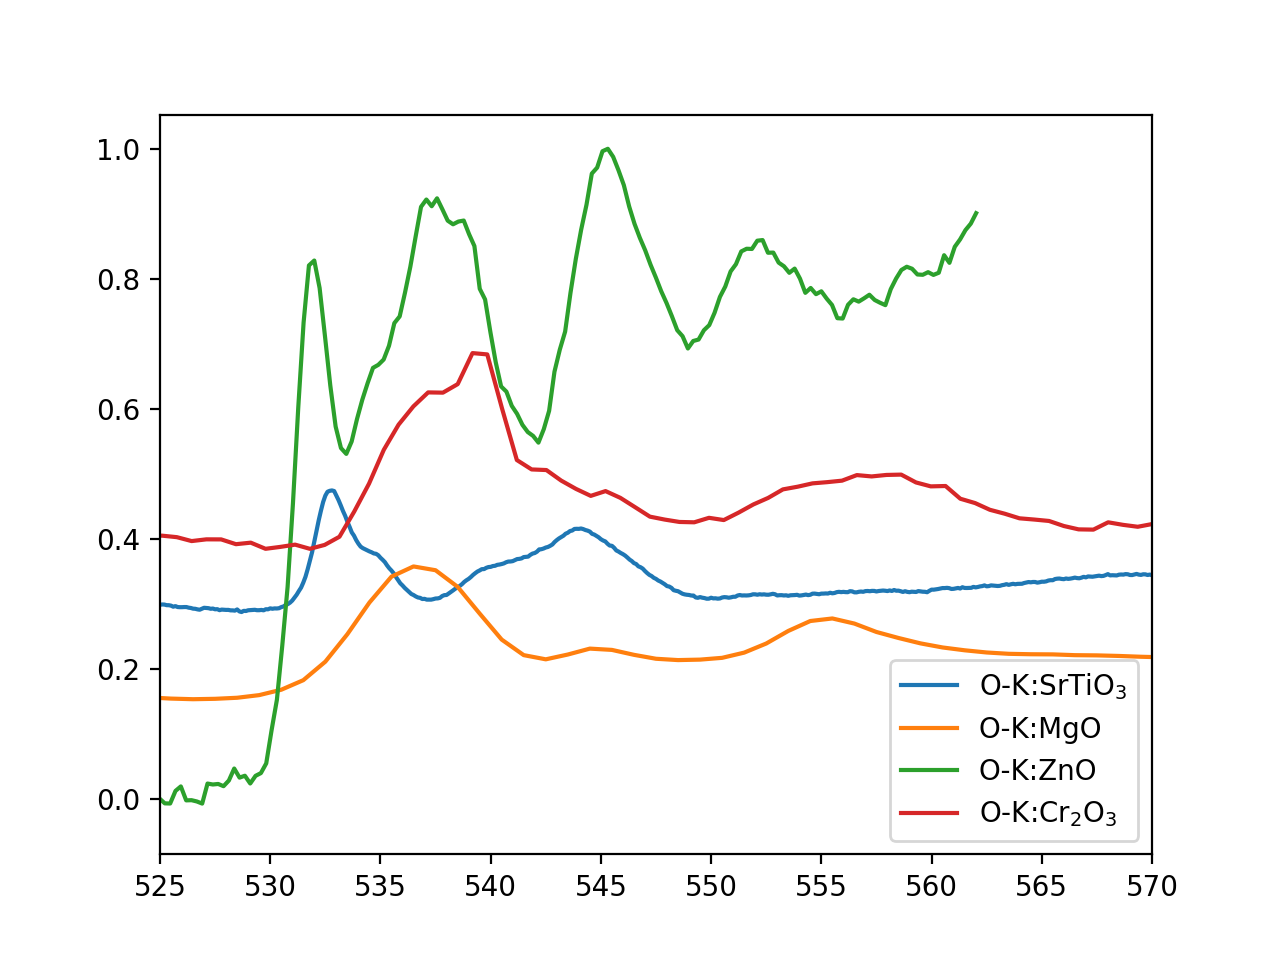

(525.0, 570.0)

In [10]:
O_reference_titles = ['SrTiO3_O_K_imhoff_232',
                      'MgO_O_K_Giovanni_Bertoni_112',
                      'ZnO_O_K_Wilfried_Sigle_169',
                      'Cr2O3_(alpha)_O_K_Rik_Brydson_158'
                     ]
O_reference_materials = ['SrTiO$_3$', 'MgO', 'ZnO', 'Cr$_2$O$_3$']
plt.figure()
i = 0
for name, spectrum  in O_reference_spectra.items(): 
    if spectrum['TITLE'] in O_reference_titles:
        plt.plot(spectrum['enery_scale'],spectrum['data']/np.max(spectrum['data']), label = 'O-K:'+O_reference_materials[i])
        i+=1
    
plt.legend();
plt.xlim(525,570)



A comparison hows that the cubic oxides MgO and MgAl$_2$O$_4$ (spinel structure) have a similar ELNES which differs from the ELNES from the rhombohedral oxide Al$_2$O$_3$.


Correlation effects of valence electrons cause the so called Hubbard band. These bands dominate the electronic structure in high T$_c$ semiconductors, giant magnet resistors and other materials with high correlations.

In the figure below, we see that such a correlation effect takes place in the giant magneto-resistor LaMnO$_3$ but not in the perovskite LaAlO$_3$, which does not have this splitting of the d bands (Al does not have d electrons but Mn has), a precondition for the formation of a Hubbard band.
	

<img title="si-ge-shift" width="50%" alt="core-loss" src="images/O-K-LMO.jpg">

*The O-K edge in LaMnO$_3$ has a pre-peak that is interpreted as Hubbard band and is not present in LaAlO$_3$ even so it has the same structure.*

	
The same Hubbard band is visible in the high T$_c$ superconductor YBa$_2$Cu$_3$O$_{7-\delta}$.
In figure \ref{fig:O-K-YBCO-DL}, we see the probing of this Hubbard band at a dislocation in YBa$_2$Cu$_3$O$_{7-\delta}$.

<img title="si-ge-shift" width="50%" alt="core-loss" src="images/O-K-YBCO-DL.jpg">

*The O-K edge at a dislocation in YBa$_2$Cu$_3$O$_{7-\delta}$ has less of the signature of a Hubbard band than far away in the bulk. This lack of holes in the dislocation  disturbs the superconductivity and is utilized in grain boundaries for Josephson junctions but is detrimental in polycrystalline high T$_c$ wires.*


The prepeak that is caused by the Hubbard band is reduced in the vicinity of the dislocation and vanishes completely within the dislocation core. This lack of holes in the dislocation  disturbs the superconductivity and is utilized in grain boundaries for Josephson junctions but is detrimental in polycrystalline high T$_c$ wires.
    

## Spatial Resolution in EELS
% images/spat-dif-resolution.jpg}

### Methods to achieve spatial resolution
- Spot Mode
- Area Mode = Spatial Difference
- Lines Scan Mode 
    - Each Spot of Line one Spectrum
    - Each Segement of Line one Spectrum
    - Each Area of Line one Spectrum
- Spectrum Imaging

### Spot mode
% {images/spat-dif-spot.jpg}

### Spatial difference
% images/spat-dif-spatdif1.jpg
% images/spat-dif-spatdif2.jpg
% images/spat-dif-spatdif3.jpg
*EELS at Bi  doped  Cu grain boundary*
% images/spat-dif-spatdif4.jpg
% images/spat-dif-ls1.jpg
*As segregation at Si/SiO$_2$ interface*
% images/spat-dif-ls2.jpg
*As segregation at Si/Sio$_2$ interface*

### Energy Filtered Imaging (EFTEM) 
% images/spat-dif-eftem1.jpg}
% images/spat-dif-eftem2.jpg}
% images/spat-dif-eftem3.jpg}

## Summary

The core--loss part of the electron energy--loss spectrum allows us to determine:
- chemical composition
- bonding
- magnetic moment through ionic charge 

>
>	with high spatial resolution!!!
>

## Navigation
- <font size = "3">  **Up Chapter 4: [Imaging](CH4_00-Spectroscopy.ipynb)** </font>
- <font size = "3">  **Back: [Analysis of Core-Loss](CH4_09-Analysis_Core_Loss.ipynb)** </font>
- <font size = "3">  **List of Content: [Front](../_MSE672_Intro_TEM.ipynb)** </font>